In [1]:
print("Hello World")

In [19]:
# Import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [37]:
# Importing data

data = pd.read_csv("120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
regions = pd.read_csv("120-years-of-olympic-history-athletes-and-results/noc_regions.csv")

#print(data.head())

In [38]:
#data = data[(data.Medal == "Gold")]

std_by_year_sport = data.groupby(["Year","Sport"])["Height","Weight","Age"].std() # .reset_index()

#print(std_by_year_sport)

avg_std_by_year = std_by_year_sport.groupby(["Year"])["Height","Weight","Age"].mean().reset_index()

#print(avg_std_by_year)

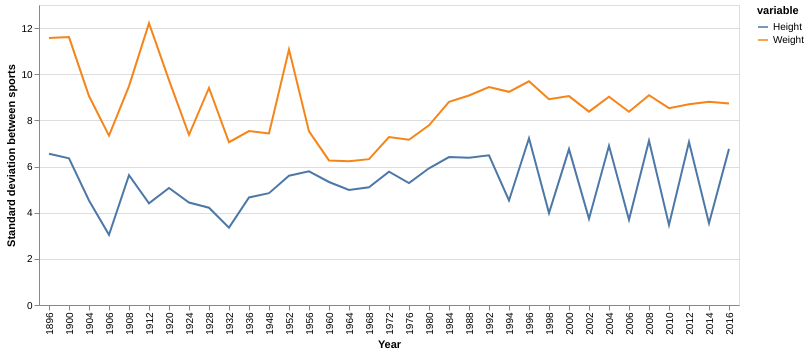

In [42]:
# standard deviation of weights between sports across years

# higher = more specialisation

# mean weights by sports by year
weight_mean_by_year = data.groupby(["Year","Sport"])["Weight"].mean()

# standard deviation between sports by year
weight_std_mean_by_year = weight_std_by_year.groupby(["Year"]).std().reset_index()

alt.Chart(weight_std_mean_by_year).mark_line().encode(
    x='Year:O',
    y='Weight:Q'
)

std_by_year = data.groupby(["Year","Sport"])["Weight","Height"].mean()

avg_std_by_year = std_by_year.groupby(["Year"]).std().reset_index()

melted = avg_std_by_year.melt(id_vars=["Year"],value_vars=["Weight","Height"],value_name="Standard deviation between sports")

alt.Chart(melted).mark_line().encode(
    x='Year:O',
    y='Standard deviation between sports:Q',
    color='variable'
)

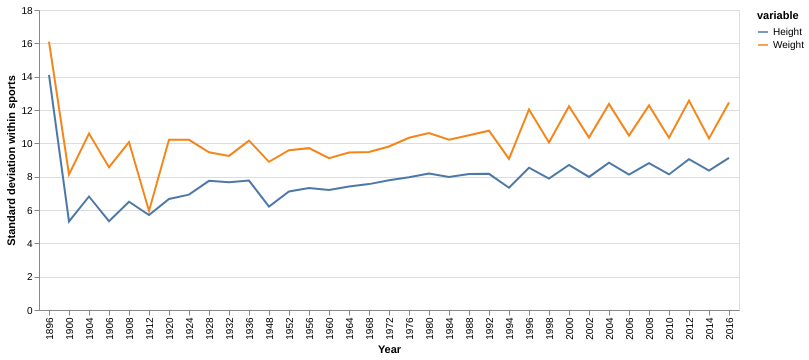

In [44]:
# average standard deviations of weights and heights within sports across years

std_by_year = data.groupby(["Year","Sport"])["Weight","Height"].std()

avg_std_by_year = std_by_year.groupby(["Year"]).mean().reset_index()

#print(avg_std_by_year.head())

#print(avg_std_by_year.melt(id_vars=["Year"],value_vars=["Weight","Height"]).head())

melted = avg_std_by_year.melt(id_vars=["Year"],value_vars=["Weight","Height"],value_name="Standard deviation within sports")

alt.Chart(melted).mark_line().encode(
    x='Year:O',
    y='Standard deviation within sports:Q',
    color='variable'
)